In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
from tensorflow.keras import layers, models

path_ep ="/home/lazaror/quantum/pruebas/EQCNN_local_testing/EQNN_for_HEP/Equivariant_QCNN/data/E-P_rescaled"
with h5py.File(path_ep, "r") as file:
    X_ep = np.array(file["X"])
    y_ep = np.array(file["y"])

In [2]:
def model_16():
    model = models.Sequential()

    model.add(layers.InputLayer(input_shape=(16, 16, 1)))

    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

model_16 = model_16()

model_16.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 16, 16, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 158,465 (619.00 KB)

 Trainable params: 158,465 (619.00 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
X_train_16, X_test_16, Y_train_16, Y_test_16 = train_test_split(X_ep, y_ep, test_size=0.2, random_state=42, stratify=y_ep)

history = model_16.fit(X_train_16[:20000], Y_train_16[:20000], epochs=10, batch_size=32, validation_data=(X_test_16[:5000], Y_test_16[:5000]))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.5592 - loss: 0.6846 - val_accuracy: 0.6230 - val_loss: 0.6570
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.6222 - loss: 0.6542 - val_accuracy: 0.6262 - val_loss: 0.6443
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.6374 - loss: 0.6406 - val_accuracy: 0.6470 - val_loss: 0.6311
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.6605 - loss: 0.6251 - val_accuracy: 0.6512 - val_loss: 0.6300
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.6599 - loss: 0.6277 - val_accuracy: 0.6766 - val_loss: 0.6173
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.6656 - loss: 0.6213 - val_accuracy: 0.6632 - val_loss: 0.6186
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.6669 - loss: 0.6174 - val_accuracy: 0.6814 - val_loss: 0.6130
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.6719 - loss: 0.6126 - 

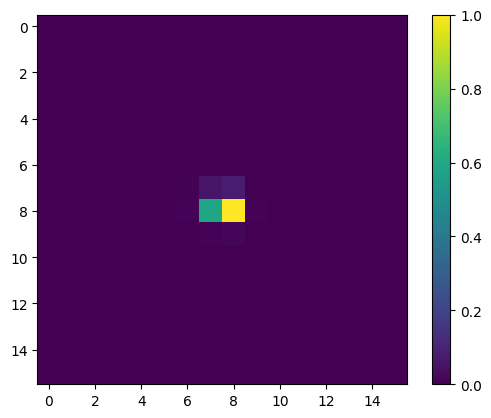

In [4]:
plt.imshow(X_train_16[0])
plt.colorbar()

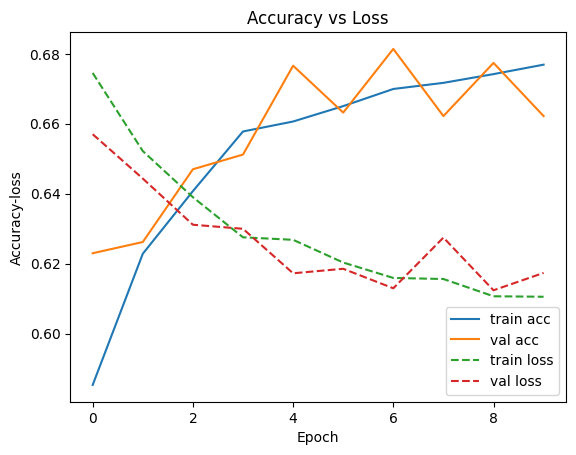

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = "train acc")
plt.plot(history.history['val_accuracy'], label ="val acc")

plt.plot(history.history['loss'], "--", label = "train loss")
plt.plot(history.history['val_loss'], "--", label = "val loss")
plt.title('Accuracy vs Loss')
plt.ylabel('Accuracy-loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()